In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

from sklearn.linear_model import LinearRegression

In [2]:
YEARS = [2016, 2017, 2018, 2019, 2020, 2021]

yearly_prices = []
yearly_rain = []
yearly_rain_bd = []

for year in YEARS:
    prices_df = pd.read_csv('data/case1/prices_'+str(year)+'.csv')
    rain_df = pd.read_csv('data/case1/rain_'+str(year)+'.csv')

    prices = list(prices_df['Daily Price'])
    rain = list(rain_df['Historical Monthly Rain'])

    # yearly_prices.append(prices)
    # yearly_rain.append(rain)
    # yearly_rain_bd.append([rain[i // 21] for i in range(len(prices))])

    yearly_prices += prices
    yearly_rain += rain
    yearly_rain_bd += [rain[i // 21] for i in range(len(prices))]

prices = np.asarray(yearly_prices)
rain = np.asarray(yearly_rain)
rain_bd = np.asarray(yearly_rain_bd)

print(prices.shape)
print(rain.shape)
print(rain_bd.shape)

(1512,)
(72,)
(1512,)


In [3]:
rain_ma = []
# for i in range(len(YEARS)):
#     rain_ma.append(np.convolve(rain_bd[i],np.ones(42,dtype=int),'same'))
rain_ma = np.convolve(rain_bd, np.ones(21,dtype=int),'same')

rain_ma = np.asarray(rain_ma)
print(rain_ma.shape)

(1512,)


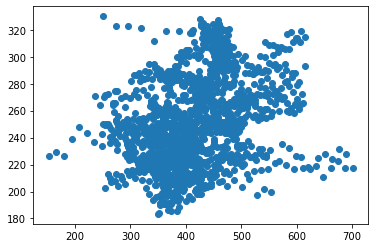

In [4]:
# for i in range(len(yearly_prices)):
#     plt.scatter(rain_ma[i], yearly_prices[i])
plt.scatter(rain_ma, prices)

In [5]:
def generate_windows(window_size):

    n = len(rain) - window_size + 1

    X = np.zeros((n, window_size))
    y = np.zeros(n)

    for i in range(n):
        X[i] = rain[i:i+window_size]
        y[i] = np.mean(prices[21*i:21*(i+1)])
    
    return X, y

In [6]:
for i in range(2, 20):
    X, y = generate_windows(i)
    reg = LinearRegression()
    reg.fit(X, y)
    print(i)
    print(X.shape)
    print(reg.score(X, y)) 

2
(71, 2)
0.11219411527391898
3
(70, 3)
0.11770272700904971
4
(69, 4)
0.11246167932243711
5
(68, 5)
0.11440348250931143
6
(67, 6)
0.12578597697285288
7
(66, 7)
0.12353327154004701
8
(65, 8)
0.12196256340221578
9
(64, 9)
0.12249580517175984
10
(63, 10)
0.12943927868503513
11
(62, 11)
0.14334246817150864
12
(61, 12)
0.1381743142955565
13
(60, 13)
0.13230574741390666
14
(59, 14)
0.16884654607938676
15
(58, 15)
0.19658998329170296
16
(57, 16)
0.23135479469226639
17
(56, 17)
0.20453221735146665
18
(55, 18)
0.21065199068983376
19
(54, 19)
0.22575433393742284


In [9]:
X, y = generate_windows(3)
reg = LinearRegression()
reg.fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.11770272700904971
[ 2.2790961  -0.08148768  0.07962164]
204.064623223388


In [10]:
X, y = generate_windows(6)
reg = LinearRegression()
reg.fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
print(X[0], y[0])

0.12578597697285288
[ 2.1531901  -0.10836614 -0.03793308  0.13202504  0.30395066  0.7634381 ]
184.36226605192425
[13.82 17.22 17.35 20.63 33.41 20.02] 229.4242857142857


In [11]:
print(scipy.stats.pearsonr(rain_bd, prices))

(0.3366117549711163, 2.2474095003895096e-41)


In [12]:
print(scipy.stats.spearmanr(rain_bd, prices))

SpearmanrResult(correlation=0.3904239393596906, pvalue=3.100922352760803e-56)
